In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Cars_mileage.csv')

In [3]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
df.shape

(81, 5)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_data=scaler.transform(df)

In [9]:
scaled_data

array([[-1.20629511,  2.12438703, -0.44061061, -1.23140253, -0.49023816],
       [-1.1005866 ,  1.7180708 , -0.30525236, -1.14087145, -0.26129934],
       [-1.1005866 ,  1.7180708 , -0.30525236, -1.14087145, -0.29799301],
       [-0.83631531,  1.24235454, -0.30525236, -0.57323872, -0.2391033 ],
       [-1.13582277,  1.77215741, -0.30525236, -1.21182554, -0.33887816],
       [-0.83631531,  1.24235454, -0.44061061, -0.59281571, -0.37881419],
       [-1.1005866 ,  1.7180708 , -0.30525236, -1.14087145, -0.28256505],
       [-0.97726   ,  1.354778  , -2.20026792, -1.34399532, -2.22453536],
       [-0.97726   ,  1.354778  , -2.20026792, -1.34399532, -2.15581433],
       [-0.66013445,  0.86799855, -0.21501352, -0.4182792 , -0.20042158],
       [-0.78346105,  1.12736839, -0.44061061, -0.73472389, -0.40949027],
       [-0.44871742,  0.54347892, -2.20026792, -0.27968395, -2.23718888],
       [-0.44871742,  0.54347892,  0.01058357,  0.04007367,  0.05385348],
       [-0.78346105,  1.12736839, -0.4

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)

In [12]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
x_pca=pca.transform(scaled_data)

principaldf=pd.DataFrame(data=x_pca,columns=['PCA1','PCA2'])

In [27]:
principaldf



,PCA1,PCA2
0,-2.612343,-0.644779
1,-2.164822,-0.742867
2,-2.178864,-0.722544
3,-1.520455,-0.372359
4,-2.272112,-0.748503
...,...,...
76,1.379692,5.495026
77,3.377962,1.092242
78,0.473708,4.521625
79,4.508973,1.856849


In [29]:
finaldf=pd.concat([principaldf,df[['MPG']]],axis=1)

In [30]:
finaldf

,PCA1,PCA2,MPG
0,-2.612343,-0.644779,53.700681
1,-2.164822,-0.742867,50.013401
2,-2.178864,-0.722544,50.013401
3,-1.520455,-0.372359,45.696322
4,-2.272112,-0.748503,50.504232
...,...,...,...
76,1.379692,5.495026,36.900000
77,3.377962,1.092242,19.197888
78,0.473708,4.521625,34.000000
79,4.508973,1.856849,19.833733


In [42]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x432 with 0 Axes>

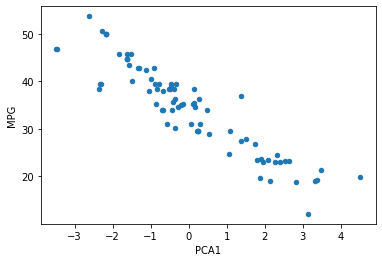

In [55]:
plt.figure(figsize=(8,6))
finaldf.plot(kind='scatter',x='PCA1',y='MPG',)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

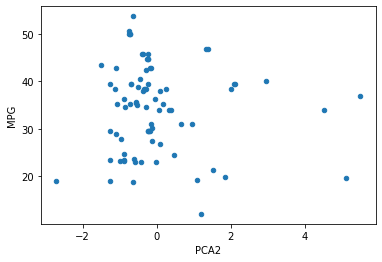

In [56]:
finaldf.plot(kind='scatter',x='PCA2',y='MPG',)
plt.show

C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

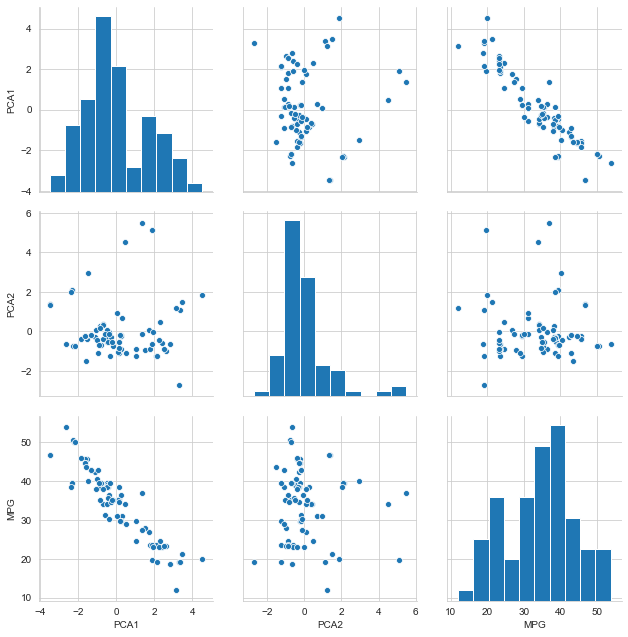

In [57]:
import seaborn as sns

sns.set_style('whitegrid')
sns.pairplot(finaldf,size=3)
plt.show



In [35]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [36]:
reg.fit(finaldf[['PCA1','PCA2']],finaldf.MPG)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
reg.coef_

array([-4.87618557, -0.38969056])

In [38]:
reg.intercept_

34.42207572802469

In [51]:
reg.score(finaldf[['PCA1','PCA2']],finaldf.MPG)

0.8562123474648006

In [64]:
reg.predict([[3.142744,1.203343]])

array([18.62854138])